In [25]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the data
origin_data = pd.read_csv('./Data/ks-projects-201801.csv',index_col=[0])

data = origin_data.copy()
#In this project, we ignore the title's factor to the successful rate. 
data.drop("name",inplace=True, axis=1)

#We only consider the projects are completed. 
data = data[data.state != "live"]

#There are many other states like failed, suspended, we consider them as failed.
data.state = data.state == "successful"
data.state = data.state.astype(int)

In [3]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,
1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [4]:
%store -r data
%store -r le
newdata = data
newdata.state = data.state.astype(int)
newdata

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,160,43,23,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,22,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,145,20,51,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,50,100.00,2421.00,30000.00
1000004038,Where is Hank?,145,20,51,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,50,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,142,35,51,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,50,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,107,20,51,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,50,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,175,21,51,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,50,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,110,21,51,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,50,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,93,21,51,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,50,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,165,15,51,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,50,8233.00,8233.00,125000.00


# Multiple Regression

In [5]:
# Creates Model
full_model = smf.ols(formula='state ~ goal + pledged + category + main_category + backers + country', data=newdata).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  state   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1529.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:51:16   Log-Likelihood:            -2.5209e+05
No. Observations:              375862   AIC:                         5.042e+05
Df Residuals:                  375855   BIC:                         5.043e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2575      0.004     72.184      0.000       0.250       0.264
goal          -1.011e-08   6.56e-10    -15.403      0.000   -1.14e-08   -8.82e-09
pledged        2.027e-07   1.16e-08     17.543      0.000     1.8e-07    2.25e-07
category          0.0003   1.74e-05     14.594      0.000       0.000       0.000
main_category    -0.0013   5.81e-05    -21.915      0.000      -0.001      -0.001
backers        5.171e-05   1.22e-06     42.445      0.000    4.93e-05    5.41e-05
country           0.0022    5.4e-05     39.869      0.000       0.002       0.002
==============================================================================
Omnibus:                    15873.523   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19195.901
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       3.573   Cond. No.                     5.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Make predictions
data['mult_predictions'] = full_model.predict()

In [7]:
# Make visuals
data.loc[data["mult_predictions"] >= 0.5,"mult_predictions"] = 1
data.loc[data["mult_predictions"] < 0.5,"mult_predictions"] = 0

<function matplotlib.pyplot.show(*args, **kw)>

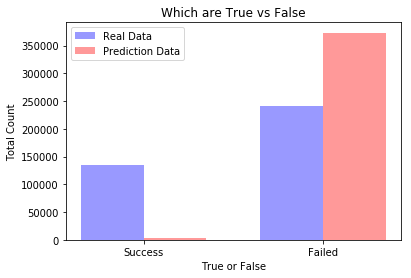

In [31]:
# Visualize results
real_success = len(data[data['state'] == 1])
fake_success = len(data[data['mult_predictions'] == 1])
real_failed = len(data[data['state'] == 0])
fake_failed = len(data[data['mult_predictions'] == 0])

x = ['Pass', 'Fail']
real = [real_success, real_failed]
fake = [fake_success, fake_failed]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
N = 2
ind = np.arange(N)

rects1 = ax.bar(ind, real, bar_width, alpha=opacity, color='b', label='Real Data')
rects2 = ax.bar(ind + bar_width, fake, bar_width, alpha=opacity, color='r', label='Prediction Data')
ax.set_xlabel('True or False')
ax.set_ylabel('Total Count')
ax.set_title('Which are True vs False')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(('Success', 'Failed'))
ax.legend()

plt.show

In [32]:
len(data[data["mult_predictions"]== data["state"]]) / len(data["state"])

0.6504222294352715